This code is designed to import and display the GLM data

In [18]:
#import resources

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import cartopy.feature as cfeature
import cartopy.mpl as cmpl
import pyproj as proj

In [34]:
#import netCDF file
nc_file = nc.Dataset('../../../localdata/cases/20180519/GLM_data/GLM-00-00_20180520_040000_60_1src_056urad-dx_total_energy.nc','r')
nc_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): nx(3249), ny(1300), ntimes(1)
    variables(dimensions): int32 goes_imager_projection(), float32 x(nx), float32 y(ny), float32 time(ntimes), float32 total_energy(ntimes,nx,ny)
    groups: 

In [10]:
time = nc_file.variables['time']
dtime = nc.num2date(time[:],time.units)
print (dtime)

[datetime.datetime(2018, 5, 20, 4, 0)]


In [11]:
#makes the variable from the netCDF file into a local variable that we can use when plotting data
GLM_var = nc_file.variables['flash_extent_density'][:,:]
GLM_var = np.squeeze(GLM_var)

x = nc_file.variables['x'][:] 
y = nc_file.variables['y'][:]

GLM_var[x==x[1850],:] = 1000
GLM_var[x==x[1600],:] = 1000

GLM_var[:,y==y[810]] = 1000
GLM_var[:,y==y[740]] = 1000
#GLM_var[GLM_var==0] = np.nan

In [12]:
x_locs = np.arange(1600,1851,1)
y_locs = np.arange(740,811,1)

GLM_iso_var = np.ones((len(x),len(y)))*np.nan

for i in x_locs:
    for j in y_locs:
        GLM_iso_var[i,j] = GLM_var[i,j]

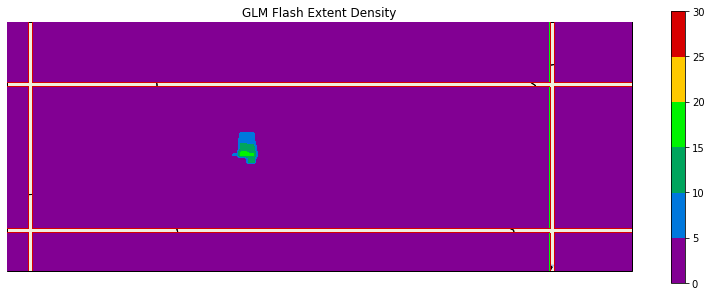

In [14]:
bounds = np.arange(0, 35, 5)

#creating plot with all the features
plt.figure(figsize=(14, 5))
ax = plt.axes(projection=ccrs.Geostationary(-75, 35786023.0))
#ax.set_extent([-87, -80, 25, 32]) #FLORIDA
#ax.set_extent([-138, -60, 24, 55]) #CONUS
ax.set_extent([-97, -90, 39, 42]) #MIZZOURI
plt.contourf(x * 35786023.0, y * 35786023.0, GLM_var.T, levels=bounds, cmap=plt.get_cmap('nipy_spectral'), zorder=10)
plt.title('GLM Flash Extent Density')
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, zorder=8)
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

we = plt.colorbar()
#plt.savefig("Average_flash_area", orientation="landscape", format="ps")


In [29]:
maptest=ccrs.Geostationary(-75, 35786023.0)

In [30]:
maptest.transform_point(-97,42)

TypeError: transform_point() takes at least 3 positional arguments (2 given)

In [31]:
ccrs.CRS.transform_point(-97,42,maptest)

TypeError: descriptor 'transform_point' requires a 'cartopy._crs.CRS' object but received a 'int'